# Single Trial Parametrization
<p>created: May 20, 2024 <br>
last modified: July 24, 2024 </p>
<p>
Compute Spectral Parametrization for single trials with and without knee (aperiodic mode)


In [59]:
# general
import os
import numpy as np
import pandas as pd
from scipy.signal import decimate
import matplotlib.pyplot as plt

# lab imports
from specparam import SpectralGroupModel
from specparam.objs import fit_models_3d, combine_model_objs
from specparam.sim import sim_group_power_spectra
from specparam.sim.utils import create_freqs
from specparam.sim.params import param_sampler
from specparam.utils.io import load_group
from neurodsp.utils import create_times

# custom
import sys
sys.path.append("../../code")
from paths import EXTERNAL_PATH, PROJECT_PATH
from settings import SPECPARAM_SETTINGS, N_JOBS
from info import SESSIONS, N_ARRAYS, N_CHANS, EPOCH_TIMES
from utils import load_nix, epoch_neo_segment
from plots import plot_regression

### load example file

In [5]:
# load example data
data = np.load('E:\data\lfp\lfp_psd\A_SNR_041018_spectra.npz')
print(data.files)

['spectra_pre', 'spectra_post', 'freq']


In [9]:
# set-up as [n_conditions, n_channels, n_freqs]
print(f"spectra_pre shape: {data['spectra_pre'].shape} \nspectra_post shape: {data['spectra_post'].shape}")

spectra_pre shape: (102, 1024, 76) 
spectra_post shape: (102, 1024, 76)


In [11]:
# initialize model and fit the 3D array of power spectra (pre, with knee)
fg = SpectralGroupModel(**SPECPARAM_SETTINGS)
fgs = fit_models_3d(fg, data['freq'], data['spectra_pre'])

c:\Users\Andre\anaconda3\envs\voytek_lab\lib\site-packages\specparam\core\funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
c:\Users\Andre\anaconda3\envs\voytek_lab\lib\site-packages\specparam\core\funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
c:\Users\Andre\anaconda3\envs\voytek_lab\lib\site-packages\specparam\core\funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
c:\Users\Andre\anaconda3\envs\voytek_lab\lib\site-packages\specparam\core\funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
c:\Users\Andre\anaconda3\envs\voytek_lab\lib\site-packages\specparam\core\funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
c:\Users\Andre\anaconda3\envs\voytek_lab\lib\site-packages\specparam\core\funcs.

In [ ]:
# [test] initialize model and fit the 3D array of power spectra (pre, without knee)
fg = SpectralGroupModel(**SPECPARAM_SETTINGS, aperiodic_mode='fixed')
fgs = fit_models_3d(fg, data['freq'], data['spectra_pre'], n_jobs=N_JOBS)

array([[[4.51328789e+03, 1.73108534e+04, 1.77866364e+04, ...,
         2.57020746e+00, 2.71163605e+00, 1.31326432e+00],
        [2.56981409e+04, 5.94112063e+04, 6.11241257e+04, ...,
         4.74229225e+00, 4.79358053e+00, 2.40821861e+00],
        [5.14884721e+03, 1.58649014e+04, 1.71773547e+04, ...,
         6.97628992e-01, 7.14045918e-01, 3.50167652e-01],
        ...,
        [2.05484083e+04, 3.64936181e+04, 3.66940021e+04, ...,
         1.38782546e+00, 1.35591897e+00, 6.88753147e-01],
        [2.53030665e+04, 4.90492602e+04, 4.60879535e+04, ...,
         2.18204625e+00, 2.15380428e+00, 1.01662215e+00],
        [2.31681283e+04, 4.51709291e+04, 3.91878438e+04, ...,
         3.78948975e+00, 3.80165945e+00, 1.92812513e+00]],

       [[1.46254191e+04, 3.32931070e+04, 3.74000960e+04, ...,
         2.94492376e+01, 2.96218170e+01, 1.51065492e+01],
        [2.28609196e+04, 4.64371415e+04, 4.24423309e+04, ...,
         3.20434201e+00, 3.18870314e+00, 1.61722508e+00],
        [9.87546071e+03, 

In [8]:
df_data = pd.DataFrame({
                'session'   :   np.repeat('session', N_ARRAYS*N_CHANS),
                'channel'   :   np.concatenate([np.arange(N_CHANS)] * N_ARRAYS),
                'chan_idx'  :   np.arange(N_ARRAYS*N_CHANS),
                'array'     :   np.repeat(np.arange(N_ARRAYS), N_CHANS) + 1,
                'epoch'     :   np.repeat('epoch', N_ARRAYS*N_CHANS)})
            

In [12]:
modes = ['fixed', 'knee']
ap_mode = np.array(np.repeat(modes, df_data.shape[0]))
ap_mode

array(['fixed', 'fixed', 'fixed', ..., 'knee', 'knee', 'knee'],
      dtype='<U5')

## Run results from step3c

In [3]:
# load results
data = pd.read_csv(r"E:\data\results\trial_psd_params_unbounded.csv")

In [5]:
data

,Unnamed: 0,session,trial,channel,chan_idx,array,epoch,ap_mode,offset,exponent,...,alpha_bw,beta_cf,beta_pw,beta_bw,gamma_cf,gamma_pw,gamma_bw,error,r_squared,knee
0,0,A_SNR_041018,0,0,0,1,pre,fixed,6.587781,2.516264,...,6.969778,26.000249,1.240696,12.0,90.357262,1.171996,12.0,0.271910,0.929683,NaN
1,1,A_SNR_041018,0,1,1,1,pre,fixed,6.876929,2.638558,...,NaN,22.007025,1.008677,12.0,NaN,NaN,NaN,0.129885,0.977510,NaN
2,2,A_SNR_041018,0,2,2,1,pre,fixed,6.824756,2.873081,...,NaN,23.613737,1.724492,12.0,65.657877,1.267338,12.0,0.256578,0.950389,NaN
3,3,A_SNR_041018,0,3,3,1,pre,fixed,7.136738,3.104948,...,NaN,24.080226,1.642581,12.0,63.572913,1.598508,12.0,0.344944,0.928016,NaN
4,4,A_SNR_041018,0,4,4,1,pre,fixed,7.343208,3.242635,...,NaN,24.606077,1.669156,12.0,63.958323,2.103061,12.0,0.470740,0.891207,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,16379,L_SNR_250717,1,59,1019,16,post,knee,18.098803,7.871791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.363185,0.940290,1.683974e+14
16380,16380,L_SNR_250717,1,60,1020,16,post,knee,15.573932,6.473384,...,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.153275,0.980118,9.463223e+11
16381,16381,L_SNR_250717,1,61,1021,16,post,knee,13.695576,5.751300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.209527,0.970377,2.795059e+09
16382,16382,L_SNR_250717,1,62,1022,16,post,knee,13.405079,5.604992,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.220410,0.965207,1.275183e+09


In [34]:
# get MUA data
data_mua_df = pd.read_csv(r"G:\Shared drives\v1_v4_1024\data\results\mua_df.csv")
data_mua_df = data_mua_df[(data_mua_df['session'] == "A_SNR_041018") | (data_mua_df['session'] == "L_SNR_250717")]
data_mua_df

,Unnamed: 0,session,array,channel,epoch,mua
0,0,A_SNR_041018,1,0,pre,4.327240
1,1,A_SNR_041018,1,1,pre,4.336008
2,2,A_SNR_041018,1,2,pre,4.323233
3,3,A_SNR_041018,1,3,pre,4.523598
4,4,A_SNR_041018,1,4,pre,3.497945
...,...,...,...,...,...,...
6139,6139,L_SNR_250717,16,59,post,5.921929
6140,6140,L_SNR_250717,16,60,post,5.528276
6141,6141,L_SNR_250717,16,61,post,5.299164
6142,6142,L_SNR_250717,16,62,post,4.856267


In [60]:
# make figure output directory
import os
DIR_FIG = f"{PROJECT_PATH}/figures/mua_v_params_07242024"
if not os.path.exists(DIR_FIG):
    os.makedirs(DIR_FIG)

session : A_SNR_041018
session : L_SNR_250717


ValueError: too many values to unpack (expected 4)

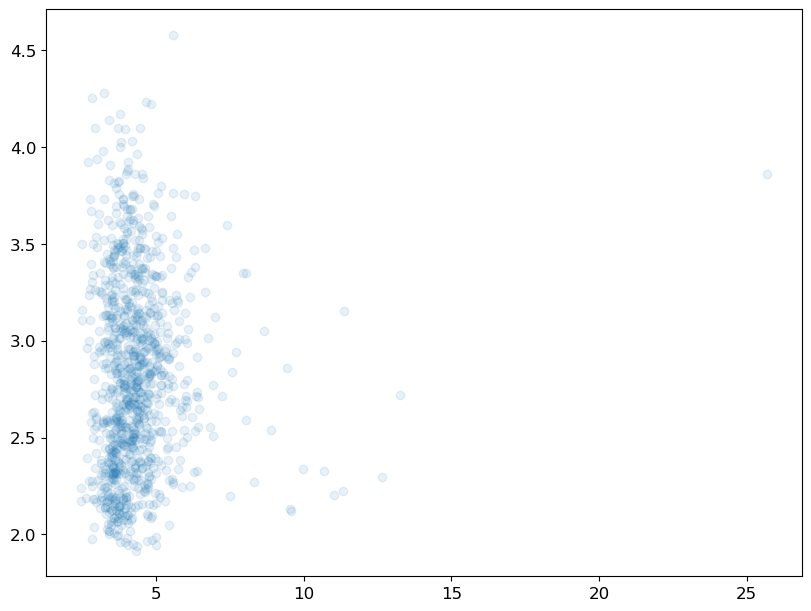

In [66]:
for i_session, session in enumerate(SESSIONS[0::2]):
    print(f"session : {session}")

for epoch in ['pre', 'post']:
    for aperiodic_mode in ['fixed', 'knee']:
        for i_session, session in enumerate(SESSIONS[0::2]):
            # get mua values
            mua = data_mua_df[(data_mua_df["session"] == session) & (data_mua_df["epoch"] == epoch)].get(["mua"])

            # get offset and exponent values
            exponent = data[(data["session"] == session) & (data["epoch"] == epoch) & (data["ap_mode"] == aperiodic_mode) & (data["trial"] == 0)].get(["exponent"])
            offset = data[(data["session"] == session) & (data["epoch"] == epoch) & (data["ap_mode"] == aperiodic_mode)].get(["offset"])

            # plotting mua_vs_exp
            if i_session == 0:
                plot_regression(mua, exponent, title=f"{session} {epoch}", xlabel='MUA', ylabel='LFP offset', label=session, label_offset=0.2*i_session)
            else:    
                ax = plt.gca()
                plot_regression(mua, exponent, ax=ax, title=epoch, xlabel='log(MUA)', ylabel='LFP offset', label=session, label_offset=0.2*i_session)

        # save
        plt.savefig(fr"{DIR_FIG}\mua_exp_{epoch}_{aperiodic_mode}.png")

In [65]:
data[(data["session"] == session) & (data["epoch"] == epoch) & (data["ap_mode"] == aperiodic_mode)]

,Unnamed: 0,session,trial,channel,chan_idx,array,epoch,ap_mode,offset,exponent,...,alpha_bw,beta_cf,beta_pw,beta_bw,gamma_cf,gamma_pw,gamma_bw,error,r_squared,knee
0,0,A_SNR_041018,0,0,0,1,pre,fixed,6.587781,2.516264,...,6.969778,26.000249,1.240696,12.0,90.357262,1.171996,12.0,0.271910,0.929683,NaN
1,1,A_SNR_041018,0,1,1,1,pre,fixed,6.876929,2.638558,...,NaN,22.007025,1.008677,12.0,NaN,NaN,NaN,0.129885,0.977510,NaN
2,2,A_SNR_041018,0,2,2,1,pre,fixed,6.824756,2.873081,...,NaN,23.613737,1.724492,12.0,65.657877,1.267338,12.0,0.256578,0.950389,NaN
3,3,A_SNR_041018,0,3,3,1,pre,fixed,7.136738,3.104948,...,NaN,24.080226,1.642581,12.0,63.572913,1.598508,12.0,0.344944,0.928016,NaN
4,4,A_SNR_041018,0,4,4,1,pre,fixed,7.343208,3.242635,...,NaN,24.606077,1.669156,12.0,63.958323,2.103061,12.0,0.470740,0.891207,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2043,A_SNR_041018,1,59,1019,16,pre,fixed,6.106953,2.339578,...,NaN,27.487133,1.274783,12.0,74.849585,1.034339,12.0,0.253976,0.932402,NaN
2044,2044,A_SNR_041018,1,60,1020,16,pre,fixed,6.530599,2.497040,...,NaN,28.426178,1.021350,12.0,46.692203,0.907873,12.0,0.194449,0.959855,NaN
2045,2045,A_SNR_041018,1,61,1021,16,pre,fixed,6.072794,2.308185,...,NaN,27.667280,1.542044,12.0,77.150481,1.458372,12.0,0.292226,0.921513,NaN
2046,2046,A_SNR_041018,1,62,1022,16,pre,fixed,7.108529,2.856813,...,NaN,26.796083,1.647553,12.0,64.607302,1.387686,12.0,0.393547,0.901523,NaN


In [64]:
data_mua_df[(data_mua_df["session"] == session) & (data_mua_df["epoch"] == epoch)].get(["mua"])

,mua
0,4.327240
1,4.336008
2,4.323233
3,4.523598
4,3.497945
...,...
1979,4.849449
1980,4.987059
1981,5.299675
1982,5.099766


### MUA analysis plot

In [ ]:
for session in SESSIONS[0::2]:
    # get df for one session
    session_df = data[data.get('session') == session].loc[((data['window']>124) & (data['window']<375))]

    count = 0
    z_offs = np.array([])
    z_exps = np.array([])

    for i in range(TOTAL_CHANS):
        # channel zscore values
        data_a = session_df.iloc[np.arange(count, count + 250)]

        z_off = zscore(data_a['offset'], nan_policy='omit')
        z_offs = np.append(z_offs, z_off)

        z_exp = zscore(data_a['exponent'], nan_policy='omit')
        z_exps = np.append(z_exps, z_exp)

        count = count + 250
    
    # add zscore and time variables to df
    data_az = session_df.assign(z_offset = z_offs).assign(z_exponent = z_exps).assign(time = (session_df.get('window')/FS) + EPOCH_TIMES[0])

    # subtract basleine 
    relative_off = subtract_baseline(data_az.get('z_offset'), data_az.get('time'), np.array([data_az.get('time').min(), 0]))
    data_az = data_az.assign(relative_offset=relative_off)
    relative_exp = subtract_baseline(data_az.get('z_exponent'), data_az.get('time'), np.array([data_az.get('time').min(), 0]))
    data_az = data_az.assign(relative_exponent=relative_exp)

    # compute left and right endpoint confidence intervals
    lci_off = np.array([])
    rci_off = np.array([])
    lci_exp = np.array([])
    rci_exp = np.array([])

    for i in np.unique(data_az.get('window')):
        window_df = data_az[data_az.get('window') == i]

        ci_offset = compute_confidence_interval(window_df.get('z_offset'))
        lci_off = np.append(lci_off, ci_offset[0])
        rci_off = np.append(rci_off, ci_offset[1])

        ci_exponent = compute_confidence_interval(window_df.get('z_exponent'))
        lci_exp = np.append(lci_exp, ci_exponent[0])
        rci_exp = np.append(rci_exp, ci_exponent[1])


    # average components per window
    data_az = data_az.groupby('window').mean().reset_index()

    # plot offset
    fig, ax = plt.subplots()
    ax.plot(data_az.get('time'), data_az.get('z_offset'), c='b')
    ax.plot(data_az.get('time'), data_az.get('relative_offset'), c='r')
    ax.fill_between(data_az.get('time'), lci_off, rci_off, alpha=0.4)
    
    ax.set_title(f'{session} offset')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(r'$\Delta$ Offset (z-score)')
    ax.axhline(y=0, color='k', linestyle='--')
    ax.axvline(x=0, color='k', linestyle='--')
    plt.show()
    fig.savefig(f'{PROJECT_PATH}/figures/stm_params/{session}_off_07242024')

    # plot exponent
    fig, ax = plt.subplots()
    ax.plot(data_az.get('time'), data_az.get('z_exponent'), c='b')
    ax.plot(data_az.get('time'), data_az.get('relative_exponent'), c='r')
    ax.fill_between(data_az.get('time'), lci_exp, rci_exp, alpha=0.4)
    
    ax.set_title(f'{session} exponent')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(r'$\Delta$ Exponent (z-score)')
    ax.axhline(y=0, color='k', linestyle='--')
    ax.axvline(x=0, color='k', linestyle='--')
    plt.show()
    fig.savefig(f'{PROJECT_PATH}/figures/stm_params/{session}_exp_07242024')


KeyboardInterrupt



In [ ]:
# get MUA
mua_data = np.array([])

for session in SESSIONS[0::2]:
    print(f"session : {session}")

    # loop through arrays
    for i_array in range(1, N_ARRAYS+1):
        ### print(f"    plotting array: {i_array}/{N_ARRAYS}")
        idx_nsp = (i_array+1) // 2

        # load data
        fname_in = fr"{EXTERNAL_PATH}\V1_v4_1024_electrode_resting_state_data\data\{session}\MUAe\NSP{idx_nsp}_array{i_array}_MUAe.nix"
        segment, analog_signal = load_nix(fname_in)
        signal = segment.analogsignals[0].T # transpose to get channels x time
        fs = analog_signal._sampling_rate.item()

        # epoch data into trials around stimulus times
        epochs = epoch_neo_segment(segment, segment.epochs[0], reset_time=True) 
        epoch_times = create_times(epochs.shape[-1]/fs, fs, start_val=EPOCH_TIMES[0]) # get times for each epoch

        for i_chan in range(N_CHANS):
            # downsample MUAe signal from 1000Hz to LFP sampling rate (500Hz)
            chan_mua = epochs[:,i_chan,:].mean(axis=0) # mean across trials 
            mua_times = decimate(chan_mua, 2) 
            
            mua = np.append(mua, mua_times)
        
    idx_nsp = 0

data = lfp_data.assign(mua=mua)
data.to_csv(f'{PROJECT_PATH}/data/results/lfp_stm_params_mua.csv')

In [ ]:
data_mua_df = pd.read_csv(r"G:\Shared drives\v1_v4_1024\data\results\mua_df.csv")

In [ ]:
data_mua_df

,Unnamed: 0,session,array,channel,epoch,mua
0,0,A_SNR_041018,1,0,pre,4.327240
1,1,A_SNR_041018,1,1,pre,4.336008
2,2,A_SNR_041018,1,2,pre,4.323233
3,3,A_SNR_041018,1,3,pre,4.523598
4,4,A_SNR_041018,1,4,pre,3.497945
...,...,...,...,...,...,...
6139,6139,L_SNR_250717,16,59,post,5.921929
6140,6140,L_SNR_250717,16,60,post,5.528276
6141,6141,L_SNR_250717,16,61,post,5.299164
6142,6142,L_SNR_250717,16,62,post,4.856267


In [ ]:
data_stm_mua = pd.read_csv(r"G:\Shared drives\v1_v4_1024\data\results\lfp_stm_params_mua.csv")
data_stm_mua

,Unnamed: 0,session,channel,chan_idx,array,event,window,offset,knee,exponent,...,alpha_bw,beta_cf,beta_pw,beta_bw,gamma_cf,gamma_pw,gamma_bw,error,r_squared,mua
0,0,A_SNR_041018,0,0,1,0,0,7.068212,26.097249,2.463653,...,NaN,21.437313,0.168845,10.332144,84.997921,0.156605,12.000000,0.028293,0.997689,4.001785
1,1,A_SNR_041018,0,0,1,0,1,7.056096,24.068508,2.454148,...,NaN,21.394624,0.170354,10.480322,84.672124,0.148680,12.000000,0.029159,0.997553,4.143617
2,2,A_SNR_041018,0,0,1,0,2,7.070051,24.997533,2.461350,...,NaN,21.510257,0.169780,10.529155,84.774941,0.156062,12.000000,0.031145,0.997212,4.229744
3,3,A_SNR_041018,0,0,1,0,3,7.175006,26.905129,2.534862,...,NaN,21.661790,0.159980,11.073050,87.003636,0.170055,12.000000,0.024977,0.998306,4.241834
4,4,A_SNR_041018,0,0,1,0,4,7.189124,28.052876,2.541971,...,NaN,21.704949,0.160681,10.970302,87.085582,0.177702,12.000000,0.025162,0.998296,4.294244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535995,1535995,L_SNR_250717,63,1023,16,1023,495,7.103364,53.983681,2.348764,...,NaN,22.025689,0.289629,12.000000,62.075285,0.247461,6.669022,0.056425,0.990204,5.055824
1535996,1535996,L_SNR_250717,63,1023,16,1023,496,7.046742,49.437601,2.316473,...,NaN,22.103592,0.295201,11.999999,61.936765,0.230836,6.632648,0.049729,0.991580,5.253525
1535997,1535997,L_SNR_250717,63,1023,16,1023,497,6.947407,36.003758,2.249016,...,NaN,18.909868,0.411589,4.487576,87.888793,0.220676,11.091132,0.047213,0.990250,5.049650
1535998,1535998,L_SNR_250717,63,1023,16,1023,498,6.962981,48.195317,2.256941,...,NaN,22.417436,0.285454,11.959147,88.263527,0.234457,9.729805,0.059929,0.987163,4.720909
